# 1| Mengimpor libraries yang penting

In [1]:
# libraries for system
import os # Membuat, menghapus, dan mengubah nama file atau direktori dan memeriksa apakah sebuah file atau direktori ada.
import time # Mengatur fungsi waktu, seperti tidur (delay), pengukuran waktu, dll.
import shutil # Menyalin dan memindahkan file serta direktori.
import pathlib # Memanipulasi jalur file dan direktori dengan cara yang lebih mudah dan lebih berorientasi objek.
import itertools # Menyediakan fungsi-fungsi yang membangun iterator yang efisien untuk looping.
from PIL import Image # Memanipulasi dan memproses gambar.


# import data handling tools
import cv2 # Mengolah dan memproses gambar dan video (OpenCV).
import numpy as np # Mendukung komputasi numerik dengan array dan matriks besar, serta berbagai fungsi matematika.
import pandas as pd # Mengelola dan menganalisis data dalam bentuk tabel atau DataFrame.
import seaborn as sns # Membuat visualisasi statistik yang lebih menarik dan informatif.
sns.set_style('darkgrid') # Mengatur gaya tampilan grafik menjadi "darkgrid".
import matplotlib.pyplot as plt # Membuat berbagai jenis grafik dan plot.
from sklearn.model_selection import train_test_split # Membagi dataset menjadi set pelatihan dan pengujian.
from sklearn.metrics import confusion_matrix, classification_report # Menghitung dan menampilkan metrik evaluasi model seperti confusion matrix dan laporan klasifikasi.


# import Deep Learning libraries
import tensorflow as tf # Kerangka kerja untuk pengembangan dan pelatihan model machine learning dan deep learning.
from tensorflow import keras # Abstraksi tingkat tinggi untuk membangun dan melatih model deep learning.
from tensorflow.keras.models import Sequential # Model sekuensial untuk membangun lapisan neural network secara berurutan.
from tensorflow.keras.optimizers import Adam, Adamax # Optimizer untuk mengatur pembaruan bobot dalam pelatihan model.
from tensorflow.keras.metrics import categorical_crossentropy # Metrik untuk mengukur kesalahan klasifikasi.
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Menghasilkan batch tensor gambar dengan augmentasi data real-time.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization # Lapisan-lapisan neural network yang umum digunakan dalam model deep learning untuk pengenalan gambar.
from tensorflow.keras import regularizers # Regularisasi untuk menghindari overfitting dalam model deep learning.

# Ignore Warnings untuk menyembunyikan semua peringatan agar output lebih bersih dan tidak terganggu oleh pesan-pesan peringatan.
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


# 2| Data preprocessing

In [2]:
# Inisialisasi variabel yang berisi dataset train
train_dir = './expressions/train'
filepaths = []
labels = []

# Iterasi melalui folder untuk mengakses file train yang ada di dalam direktori.
folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Membuat dataframe untuk menyediakan struktur data yang terstruktur dan mudah diakses
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

# Code diatas berfungsi untuk membangun sebuah DataFrame train_df yang berisi jalur file dan label dari dataset train untuk deteksi emosi.

In [3]:
# DataFrame yang berisi informasi tentang jalur file (filepaths) dan label (labels) dari dataset train untuk deteksi emosi.
train_df

,filepaths,labels
0,./expressions/train\angry\im0.png,angry
1,./expressions/train\angry\im1.png,angry
2,./expressions/train\angry\im10.png,angry
3,./expressions/train\angry\im100.png,angry
4,./expressions/train\angry\im1000.png,angry
...,...,...
28704,./expressions/train\surprised\im995.png,surprised
28705,./expressions/train\surprised\im996.png,surprised
28706,./expressions/train\surprised\im997.png,surprised
28707,./expressions/train\surprised\im998.png,surprised


In [4]:
# Inisialisasi variabel yang berisi dataset test
test_dir = './expressions/test'
filepaths = []
labels = []

# Iterasi melalui folder untuk mengakses file test yang ada di dalam direktori.
folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Membuat dataframe untuk menyediakan struktur data yang terstruktur dan mudah diakses
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)

In [5]:
# DataFrame yang berisi informasi tentang jalur file (filepaths) dan label (labels) dari dataset test untuk deteksi emosi.
test_df

,filepaths,labels
0,./expressions/test\angry\im0.png,angry
1,./expressions/test\angry\im1.png,angry
2,./expressions/test\angry\im10.png,angry
3,./expressions/test\angry\im100.png,angry
4,./expressions/test\angry\im101.png,angry
...,...,...
7173,./expressions/test\surprised\im95.png,surprised
7174,./expressions/test\surprised\im96.png,surprised
7175,./expressions/test\surprised\im97.png,surprised
7176,./expressions/test\surprised\im98.png,surprised


# 3| Memisahkan DataFrame menjadi set train, validation, dan test

In [6]:
# Digunakan untuk membagi dataframe test_df menjadi dua bagian, yaitu test_df dan valid_df
valid_df, test_df = train_test_split(test_df,  train_size= 0.6, shuffle= True, random_state= 123)

# 4| Image Data Generator

In [7]:
# Proses cropping (memotong) gambar
# Dilakukan untuk menghasilkan gambar dengan ukuran yang konsisten atau fokus pada bagian tertentu dari gambar asli.

batch_size = 16 # Menentukan jumlah sampel gambar yang akan digunakan dalam satu iterasi selama pelatihan (dan validasi serta pengujian) model.
img_size = (224, 224) # Menentukan ukuran gambar yang akan digunakan sebagai input untuk model. Dalam kasus ini, gambar akan dipotong atau diubah ukurannya menjadi 224x224 piksel.
channels = 3 # Menentukan jumlah saluran warna pada gambar. Dalam kasus RGB (Red, Green, Blue), jumlah saluran warna adalah 3.
img_shape = (img_size[0], img_size[1], channels) # Menentukan bentuk akhir dari setiap gambar setelah diproses, yaitu (224, 224, 3) dalam format (tinggi, lebar, channels).

# Dalam kode ini, tr_gen dan ts_gen digunakan untuk generator train dan validation.
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

# Membuat generator aliran data untuk train (train_gen) dari DataFrame train_df.
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Membuat generator aliran data untuk validation (valid_gen) dari DataFrame valid_df
valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Membuat generator aliran data untuk test (test_gen) dari DataFrame test_df.
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

# Dengan menggunakan generator data, proses dan pelatihan model dapat lebih efisien dengan menggunakan TensorFlow/Keras, serta melakukan evaluasi yang akurat terhadap performa model pada data yang tidak terlihat selama pelatihan.

Found 28709 validated image filenames belonging to 7 classes.
Found 4306 validated image filenames belonging to 7 classes.
Found 2872 validated image filenames belonging to 7 classes.


# 5| Menampilkan sampel gambar dari data pelatihan

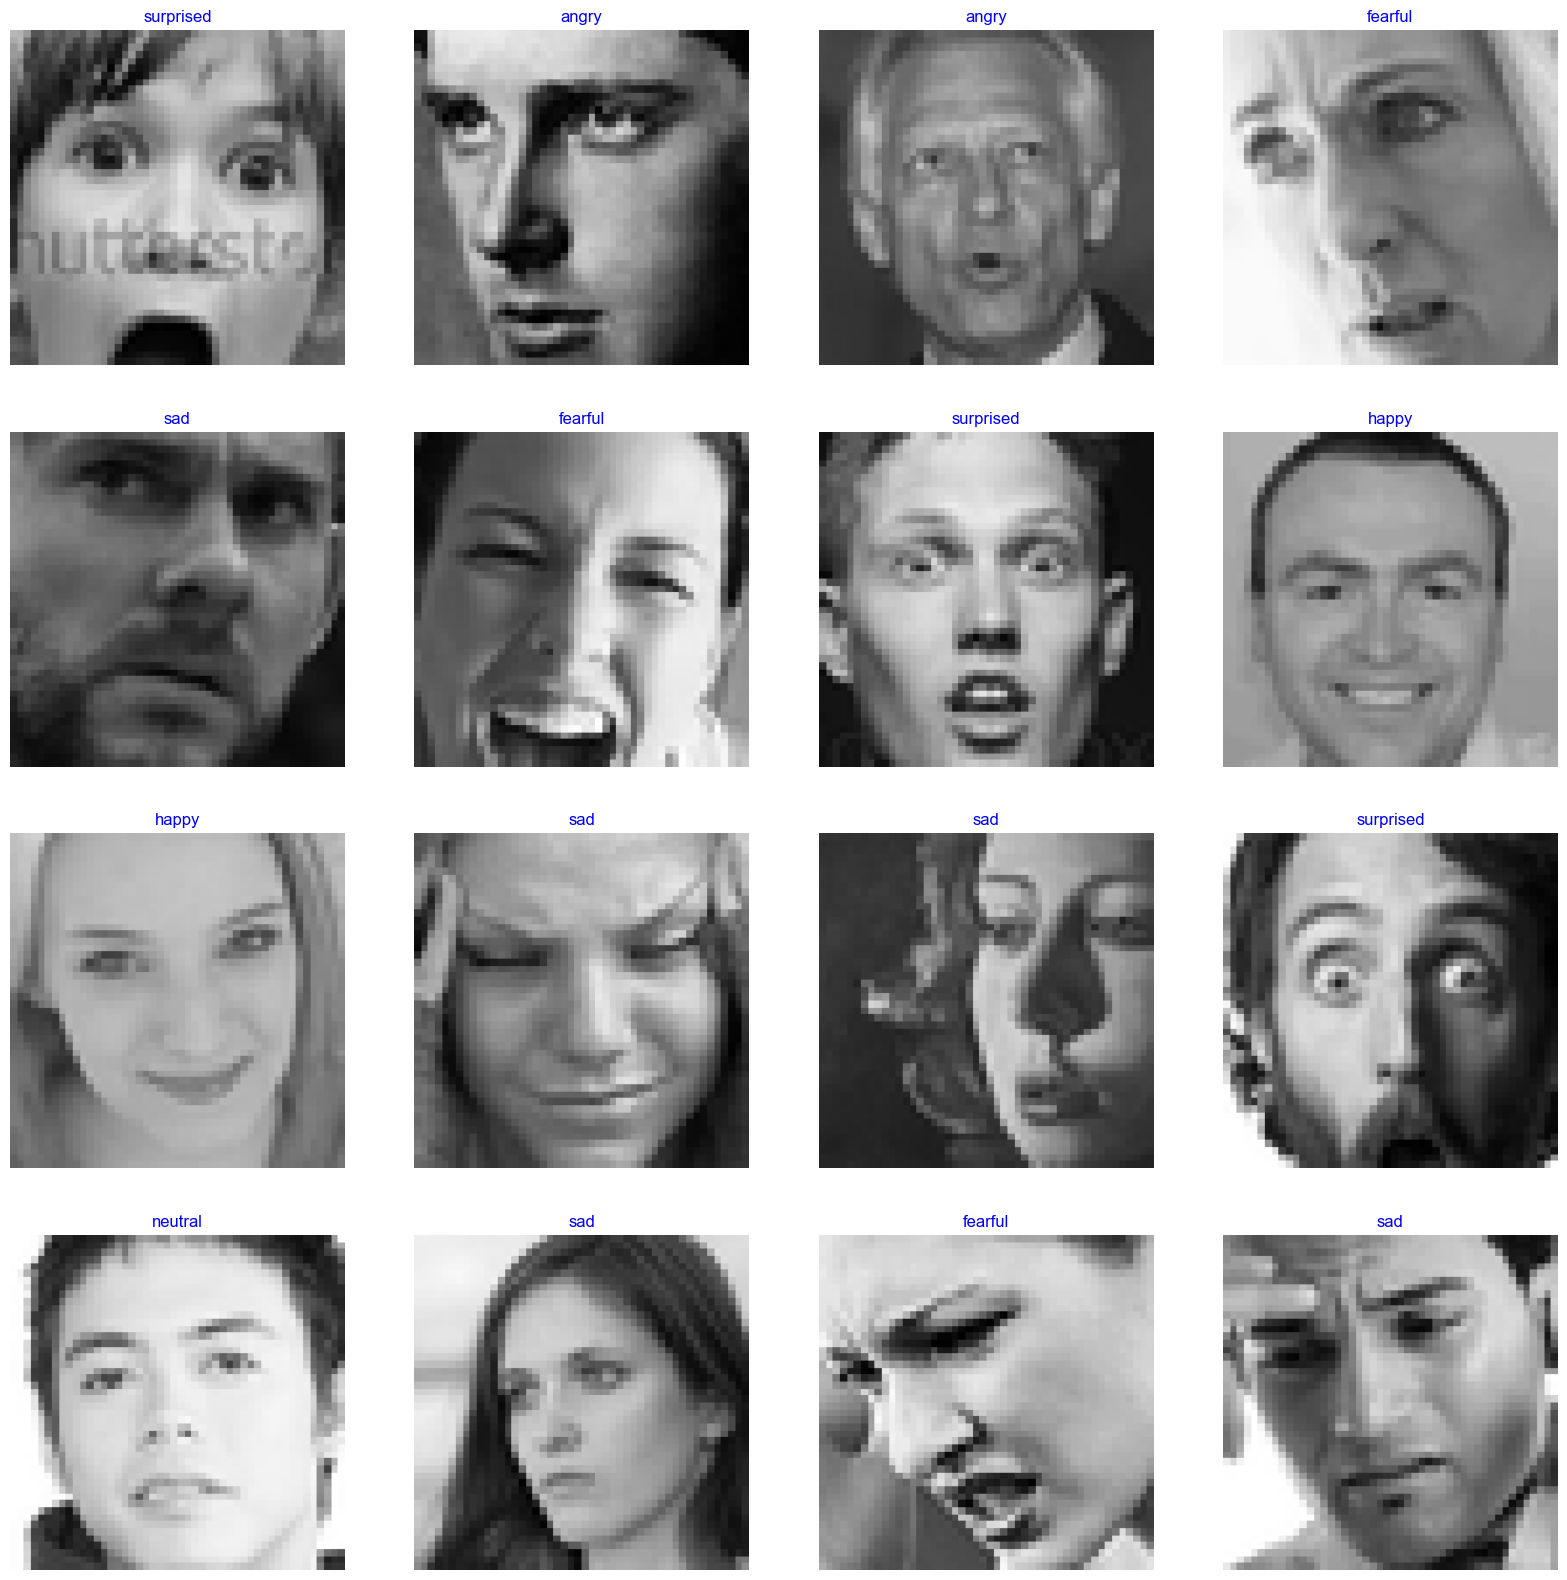

In [8]:
g_dict = train_gen.class_indices # Mengambil dictionary yang berisi pasangan kunci-nilai dari kelas dan indeksnya dari generator data pelatihan (train_gen). Ini berguna untuk mengonversi prediksi model kembali ke label kelas saat menampilkan gambar.
classes = list(g_dict.keys()) # Mendefinisikan daftar nama kelas dari dictionary g_dict. Ini akan digunakan untuk menetapkan nama kelas ke gambar yang ditampilkan.
images, labels = next(train_gen) # Mengambil satu batch gambar dan label dari generator pelatihan. Jumlah gambar dalam batch disesuaikan dengan batch_size yang telah ditentukan sebelumnya.

plt.figure(figsize= (20, 20)) # Plot gambar-gambar dengan nama kelasnya

for i in range(16): # Iterasi dilakukan sebanyak 16 kali untuk setiap gambar dalam batch
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # Menormalisasi data setiap gambar ke dalam rentang (0 - 1) dengan membagi 255.
    plt.imshow(image) # Menggunakan imshow untuk menampilkan gambar.
    index = np.argmax(labels[i])  # Untuk mendapatkan indeks label
    class_name = classes[index]   # Untuk mendapatkan nama kelas berdasarkan indeks
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')

plt.show()

# 6| Model structure


In [9]:
#Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB7(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
# base_model.trainable = False
model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, activation= 'relu', kernel_regularizer= regularizers.l2(0.01)),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)     │ ?                      │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,097,687 (244.51 MB)

 Trainable params: 63,786,960 (243.33 MB)

 Non-trainable params: 310,727 (1.19 MB)

# 7| Fitting our model

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# Menggunakan GPU jika tersedia
device = '/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'
with tf.device(device):
    batch_size = 32   # set batch size for training
    epochs = 5  # number of all epochs in training

    # Menggunakan mixed precision training
    tf.keras.mixed_precision.set_global_policy('mixed_float16')

    # Menggunakan EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

    # Train the model yang lebih efisien dengan menggunakan generator data agar tidak lambat dan tidak memakan banyak memori.
    history = model.fit(
        train_gen,
        steps_per_epoch=train_gen.n // batch_size,
        epochs=epochs,
        validation_data=valid_gen,
        validation_steps=valid_gen.n // batch_size,
        callbacks=[early_stopping]
    )

Epoch 1/5
356/897 ━━━━━━━━━━━━━━━━━━━━ 1:02:25 7s/step - accuracy: 0.3234 - loss: 6.8114

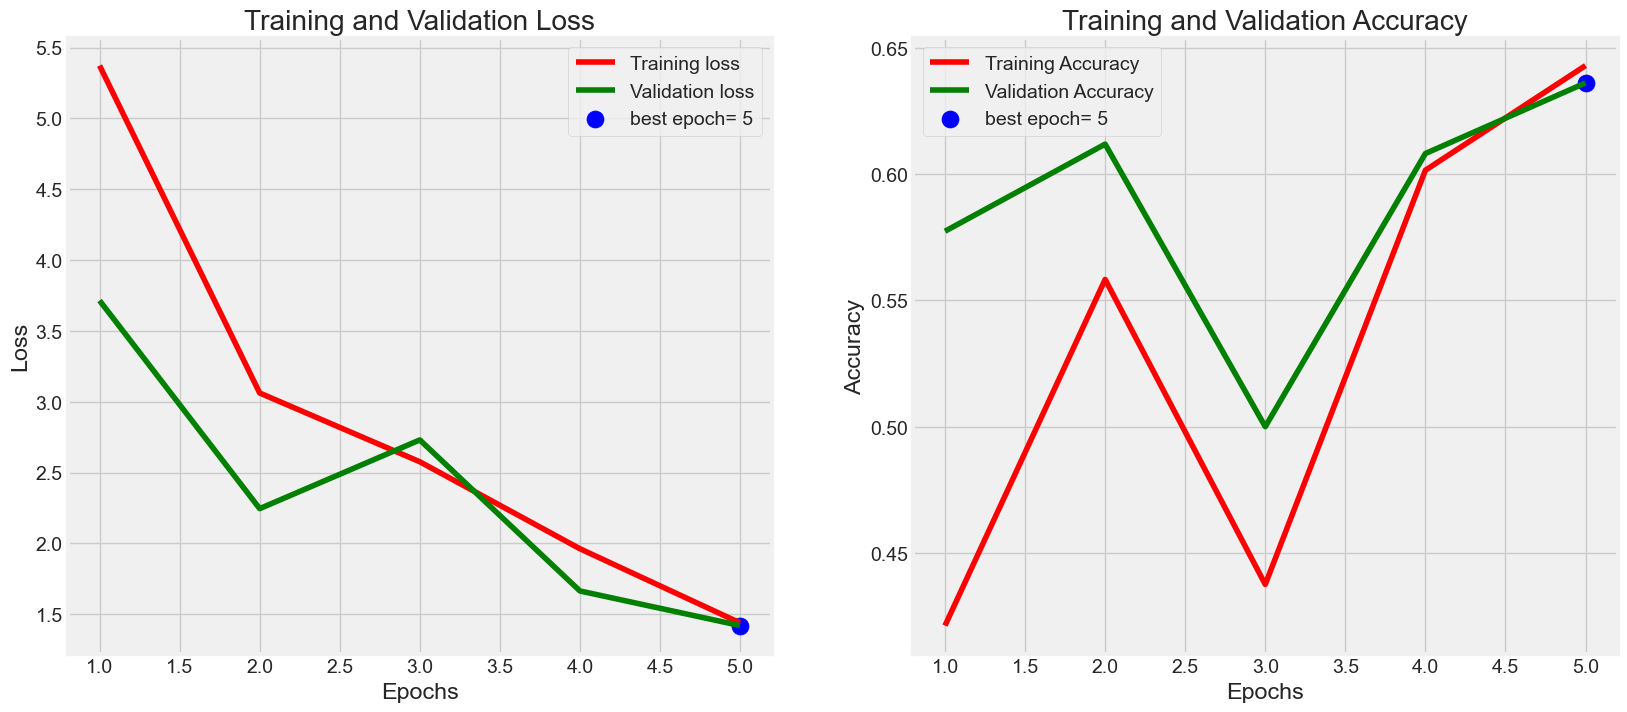

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1) 
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

# 8| Evaluate the model

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

359/359 ━━━━━━━━━━━━━━━━━━━━ 389s 1s/step - accuracy: 0.7226 - loss: 1.1258
359/359 ━━━━━━━━━━━━━━━━━━━━ 291s 809ms/step - accuracy: 0.6413 - loss: 1.4142
359/359 ━━━━━━━━━━━━━━━━━━━━ 193s 537ms/step - accuracy: 0.6291 - loss: 1.5107
Train Loss:  1.1633809804916382
Train Accuracy:  0.7235376238822937
--------------------
Validation Loss:  1.417443037033081
Validation Accuracy:  0.6363214254379272
--------------------
Test Loss:  1.5482456684112549
Test Accuracy:  0.6347492933273315


# 9| Predictions

In [ ]:
# Define a function to predict in smaller batches
def predict_in_batches(model, generator, batch_size=32):
    preds = []
    for i in range(0, len(generator), batch_size):
        batch_preds = model.predict(generator[i:i + batch_size])
        preds.append(batch_preds)
    return np.concatenate(preds, axis=0)

# Use the function to predict
preds = predict_in_batches(model, test_gen, batch_size=32)
y_pred = np.argmax(preds, axis=1)

NameError: name 'model' is not defined

# confusion matrix and classification report

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

# 10| saving the model and load it to predict

In [ ]:
model.save("./models/expression-model.h5")

In [ ]:
loaded_model = tf.keras.models.load_model('./models/expression-model.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
image_path = './expressions/test/happy/im1002.png'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

In [ ]:
image_path2 = './expressions/test/surprised/im1.png'
image = Image.open(image_path2)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam

# Memuat model pra-latih untuk deteksi emosi tanpa mengompilasinya
model = load_model('./models/fer2013_mini_XCEPTION.102-0.66.hdf5', compile=False)

# Kompilasi ulang model dengan optimizer yang sesuai
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Labels emosi yang sesuai dengan model
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Fungsi untuk mendeteksi emosi dari gambar
def detect_emotion_from_image(image_path):
    try:
        # Muat dan proses gambar
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_gray = cv2.resize(roi_gray, (64, 64))  # Mengubah ukuran menjadi 64x64
            roi = roi_gray.astype('float') / 255.0
            roi = np.expand_dims(roi, axis=-1)  # Menambahkan saluran ke dalam gambar grayscale
            roi = np.expand_dims(roi, axis=0)
            
            # Prediksi emosi
            preds = model.predict(roi)[0]
            emotion = emotion_labels[preds.argmax()]
            return emotion
    except Exception as e:
        print(f"Error detecting emotion: {e}")
        return None

# Contoh penggunaan untuk gambar
image_path = "./tests/freya.jpg"
emotion = detect_emotion_from_image(image_path)
if emotion:
    print(f"Detected emotion: {emotion}")
else:
    print("Failed to detect emotion from image.")

# Fungsi untuk mendeteksi emosi dari video
def detect_emotion_from_video(video_source=0):
    video_capture = cv2.VideoCapture(video_source)
    
    while True:
        ret, frame = video_capture.read()
        if not ret:
            break
        
        try:
            face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
            
            for (x, y, w, h) in faces:
                # Gambar kotak di sekitar wajah
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
                roi_gray = gray[y:y+h, x:x+w]
                roi_gray = cv2.resize(roi_gray, (64, 64))  # Mengubah ukuran menjadi 64x64
                roi = roi_gray.astype('float') / 255.0
                roi = np.expand_dims(roi, axis=-1)  # Menambahkan saluran ke dalam gambar grayscale
                roi = np.expand_dims(roi, axis=0)
                
                # Prediksi emosi
                preds = model.predict(roi)[0]
                emotion = emotion_labels[preds.argmax()]
                
                # Tampilkan emosi yang terdeteksi pada frame di atas kotak wajah
                cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)
        
        except Exception as e:
            print(f"Error detecting emotion: {e}")
            cv2.putText(frame, "Error detecting emotion", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('Video', frame)

        # Tekan 'q' untuk keluar dari loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    video_capture.release()
    cv2.destroyAllWindows()

# Jalankan fungsi untuk mendeteksi emosi dari video
detect_emotion_from_video()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
Detected emotion: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 